# Simulación aleatoria con Numpy

In [1]:
import numpy as np

In [2]:
# Usando el módulo random
die_roll = np.random.randint(1,7)
assert 1 <= die_roll <= 6


In [3]:
# Para guardar los valores de la simulación
np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]
assert die_rolls == [5,6,1]

print(die_rolls)

[5, 6, 1]


[3, 1, 2, 4, 1, 1, 1, 6, 6, 4, 3, 4, 2, 2, 3, 6, 1, 5, 5, 6, 1, 3, 2, 3, 3, 3, 5, 2, 4, 3, 6, 1, 2, 6, 3, 1, 4, 1, 4, 2, 4, 1, 6, 5, 2, 6, 5, 5, 1, 1, 2, 3, 5, 6, 1, 1, 6, 6, 2, 2, 2, 6, 6, 3, 4, 5, 5, 4, 4, 1, 1, 1, 1, 3, 3, 4, 1, 6, 6, 1, 6, 2, 5, 2, 5, 3, 3, 5, 5, 3, 1, 5, 1, 4, 3, 1, 5, 4, 2, 6]


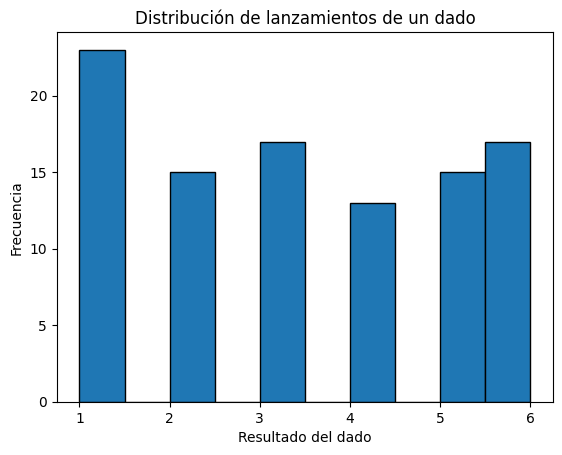

In [4]:
# Simular el lanzamiento de un dado 50 veces
np.random.seed(3)
die_result = [np.random.randint(1,7) for _ in range(100)]
print(die_result)

import matplotlib.pyplot as plt
# Graficar el histograma correctamente
plt.hist(die_result, edgecolor='black')  # Corrección: usar plt.hist() y definir 6 bins
plt.xlabel('Resultado del dado')
plt.ylabel('Frecuencia')
plt.title('Distribución de lanzamientos de un dado')
plt.show()

In [5]:
# Simulación de cara o sello
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [10]:
# Simulemos 10 lanzamientos de moneda
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flip = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flip)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


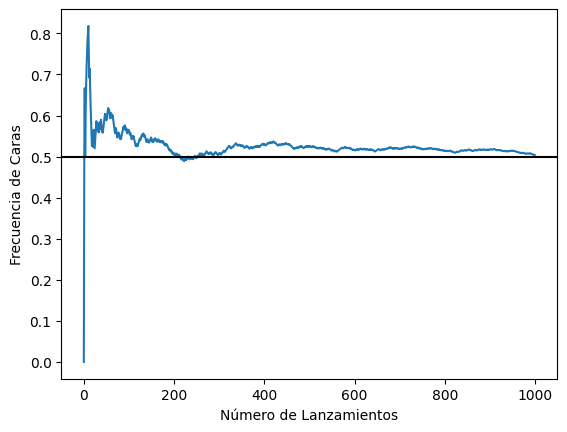

In [11]:
# Simulación con 1000 observaciones
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Frecuencia de Caras')
plt.show()

In [15]:
# Usando distribuciones de probabilidad para sesgar el resultado de lanzamiento
np.random.seed(0)
print('Lanzamiento de una moneda')
coin_flip = np.random.binomial(1, 0.7)
print(f"Basado en el lanzamiento hay: {'heads' if coin_flip == 1 else 'Tails'}.")

print('10 lanzamientos de una moneda')
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print((f"{head_count} caras observadas de "
       f"{number_coin_flips} lanzamientos"))

Lanzamiento de una moneda
Basado en el lanzamiento hay: heads.
10 lanzamientos de una moneda
6 caras observadas de 10 lanzamientos


In [17]:
# Observemos que el sesgo se mantiene incluso con 1000 lanzamientos
np.random.seed(0)
head_count = np.random.binomial(1000,0.7)
frequency = head_count / 1000
print(f"La frecuencia de caras es: {frequency}")

La frecuencia de caras es: 0.697


# Intervalo de confianza usando histogramas y matrices

In [18]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [23]:
# Para evitar el muestreo de arriba usaremos 'size'
np.random.seed(0)
head_count_array = np.random.binomial(1000,0.7, 500)

assert head_count_array.tolist() == head_count_list

# Podemos obtener frecuencias de forma directa
frequency_array = head_count_array/1000
# len(frequency_array)

In [25]:
# Veamos qué tan distantes están los datos
min_freq = frequency_array.min()
max_freq = frequency_array.max()

print(f"Mínima frecuencia observada: {min_freq}")
print(f"Máxima frecuencia observada: {max_freq}")
print(f"Rango observado: {max_freq - min_freq}")

Mínima frecuencia observada: 0.656
Máxima frecuencia observada: 0.733
Rango observado: 0.07699999999999996


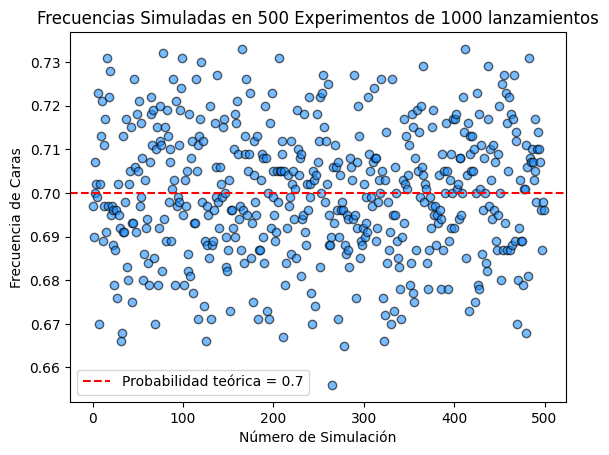

In [27]:
# Eje X: número de simulación (0 a 499)
x = np.arange(len(frequency_array))

# Scatter plot
plt.scatter(x, frequency_array, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.axhline(0.7, color='red', linestyle='--', label='Probabilidad teórica = 0.7')
plt.xlabel('Número de Simulación')
plt.ylabel('Frecuencia de Caras')
plt.title('Frecuencias Simuladas en 500 Experimentos de 1000 lanzamientos')
plt.legend()
plt.show()

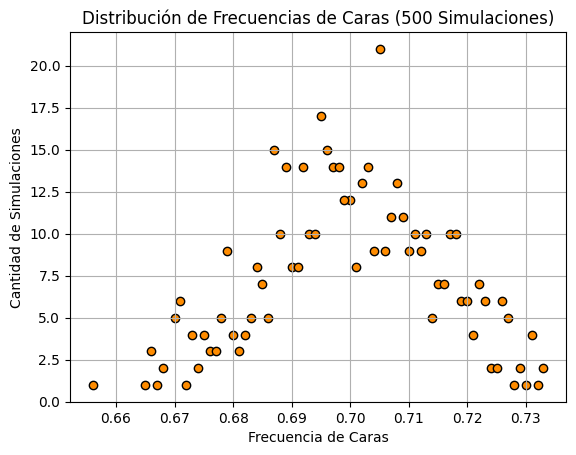

In [32]:
from collections import defaultdict 

# Contar frecuencias redondeadas
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    rounded_freq = round(frequency, 3)  # redondea a 3 decimales
    frequency_counts[rounded_freq] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

# Graficar
plt.scatter(frequencies, counts, color='darkorange', edgecolors='k')
plt.xlabel('Frecuencia de Caras')
plt.ylabel('Cantidad de Simulaciones')
plt.title('Distribución de Frecuencias de Caras (500 Simulaciones)')
plt.grid(True)
plt.show()